In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load and preprocess the data
max_features = 1000
maxlen = 500

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
# Modelo anterior
# model = Sequential()
# model.add(Embedding(max_features, 32))
# model.add(LSTM(4))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [4]:
embedding_size = 128  # Tamaño del embedding
filters = 64          # Número de filtros para Conv1D
kernel_size = 5       # Tamaño del kernel para Conv1D
lstm_units = 64       # Unidades de LSTM

In [5]:
# Definir el modelo
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)


# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Métrica a monitorear
                               patience=2,         # Número de épocas sin mejora antes de detener el entrenamiento
                               restore_best_weights=True)  # Restaurar los pesos del mejor modelo


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Se utilizó una capa Conv1D seguida de MaxPooling1D para extraer características locales de las secuencias de texto. Esto permite detectar patrones y combinaciones de palabras que podrían ser indicativas de la polaridad del sentimiento. La Conv1D con 64 filtros y un kernel de tamaño 5 permite una extracción eficaz de n-gramas, y el MaxPooling1D ayuda a reducir la dimensionalidad, lo que facilita el procesamiento en la siguiente capa.

Estas capas ayudan a reducir el ruido en los datos y a extraer características más robustas, lo que debería mejorar la capacidad del modelo para generalizar en el conjunto de validación.

La capa LSTM permite capturar dependencias a largo plazo en las secuencias, lo cual es crucial para la tarea de análisis de sentimientos. Se ha añadido un Dropout del 20% tanto en las conexiones recurrentes como en las no recurrentes para prevenir el sobreajuste. El Dropout ayuda a mitigar el riesgo de que el modelo se especialice demasiado en los datos de entrenamiento, lo que podría llevar a un rendimiento deficiente en nuevos datos.

In [6]:
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1656s 4s/step - accuracy: 0.6899 - loss: 0.5566 - val_accuracy: 0.8212 - val_loss: 0.4109
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1264s 3s/step - accuracy: 0.8391 - loss: 0.3781 - val_accuracy: 0.8626 - val_loss: 0.3239
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1242s 3s/step - accuracy: 0.8600 - loss: 0.3342 - val_accuracy: 0.8598 - val_loss: 0.3333
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1264s 3s/step - accuracy: 0.8691 - loss: 0.3127 - val_accuracy: 0.8326 - val_loss: 0.3954
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 981s 3s/step - accuracy: 0.8458 - loss: 0.3553 - val_accuracy: 0.8619 - val_loss: 0.3311
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26496s 68s/step - accuracy: 0.8731 - loss: 0.3021 - val_accuracy: 0.8734 - val_loss: 0.3076
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.8850 - loss: 0.2852 - val_accuracy: 0.8763 - val_loss: 0.3000
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18116s 46s/step - accuracy: 0.8963 - loss: 0.2594 

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 ━━━━━━━━━━━━━━━━━━━━ 813s 1s/step - accuracy: 0.8765 - loss: 0.3010
Loss: 0.297301322221756, Accuracy: 0.8777599930763245


El modelo original presenta un desempeño aceptable con una precisión final en el conjunto de prueba de aproximadamente 87.78% y una pérdida de 0.297. A lo largo de las 10 épocas de entrenamiento, se observa una mejora gradual en la precisión de entrenamiento, alcanzando un 90.94%, mientras que la precisión de validación llega a un 88%. Sin embargo, también se nota cierta fluctuación en la pérdida de validación, lo que podría ser indicativo de un sobreajuste leve a medida que el entrenamiento avanza.



Los resultados indican que, a lo largo de las épocas, la pérdida de validación fluctúa, especialmente después de la tercera época, lo que sugiere que el modelo podría estar comenzando a sobreajustarse a los datos de entrenamiento. Sin embargo, la introducción de EarlyStopping ayuda a prevenir un sobreajuste severo, ya que permite que el entrenamiento se detenga una vez que no se observa una mejora significativa en la pérdida de validación.

El modelo logra una precisión del 87.78% en el conjunto de prueba, lo que sugiere que es capaz de generalizar bastante bien. Sin embargo, la pérdida de validación mayor en las últimas épocas sugiere que podría haber margen para mejorar, quizás ajustando los hiperparámetros como la tasa de dropout, el tamaño del kernel en Conv1D, o incluso experimentando con capas adicionales.

782/782 ━━━━━━━━━━━━━━━━━━━━ 836s 1s/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

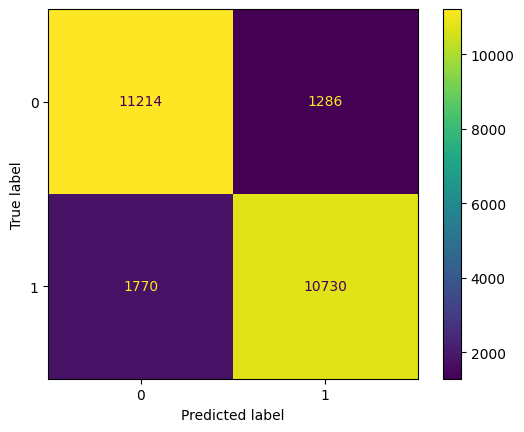

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix


La matriz de confusión muestra cómo el modelo clasifica correctamente la mayoría de las muestras, aunque todavía comete algunos errores. La mayor parte de estos errores provienen de clasificaciones incorrectas entre clases positivas y negativas.

### Conclusión
El modelo actual es bastante robusto para la tarea de clasificación de sentimientos en el dataset IMDB, logrando un equilibrio razonable entre la precisión y la capacidad de generalización. Sin embargo, los cambios propuestos y su justificación se centran en mejorar el desempeño y prevenir el sobreajuste, lo que podría llevar a un rendimiento aún mejor si se implementan adecuadamente.